# One - v/s - All 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [44]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [33]:
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
iris_X, iris_Y = iris.data[:-1,:], iris.target[:-1]
iris_Y = pd.get_dummies(iris_Y).values
print(iris_X.shape, iris_Y.shape)
numFeatures = iris_X.shape[1]
numLabels = 1
numClasses = iris_Y.shape[1]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(149, 4) (149, 3)


In [34]:
w = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, 1))
b = np.random.normal(loc=0.0, scale=0.01, size=(numLabels, 1))
print(X.shape, w.shape, b.shape)

(149, 4) (4, 1) (1, 1)


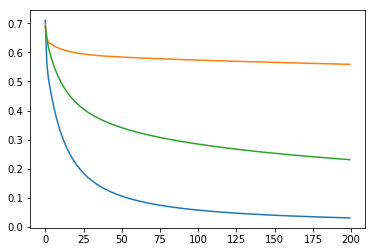

In [83]:
w = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, 1))
b = np.random.normal(loc=0.0, scale=0.01, size=(numLabels, 1))
W = []
B = []
for i in range(numClasses):
    W.append(w)
    B.append(b)
W = np.asarray(W)
B = np.asarray(B)

epochs = 200
learning_rate = 1e-1
losses = []

for i in range(epochs):
    ls = []
    for j in range(numClasses):
        
        y = Y[:, j].reshape(149, 1)
        
        z = np.add(np.matmul(X, W[j]), B[j])
        a = sigmoid(z)
        
        l = np.sum(- (y*np.log(a) + (1-y)*np.log(1-a)), axis=0, keepdims=True).T[0][0]/149
        ls.append(l)
        dz = a - y
        
        dw = X*dz
        
        dw = np.sum(dw, axis=0, keepdims=True).T/149
        db = np.sum(dz, axis=0, keepdims=True).T/149
        
        W[j] = W[j] - learning_rate*dw
        B[j] = B[j] - learning_rate*db
    losses.append(ls)
losses = np.asarray(losses)
plt.plot(losses[:, 0])
plt.plot(losses[:, 1])
plt.plot(losses[:, 2])

In [72]:
print(Y[:, 2])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
